# Animação de gráficos

- `init()` é uma função que inicializa a animação.
- `animate(i)` é a função de animação que atualiza o gráfico a cada quadro.
- `FuncAnimation` é usada para criar a animação. É fornecido o número de quadros (`frames`), o intervalo entre quadros em milissegundos (`interval`) e a opção `blit=True` para melhorar o desempenho.


**Exercício 21:** Faça uma animação para a função seno em função do tempo $y=sin(x + t)$.

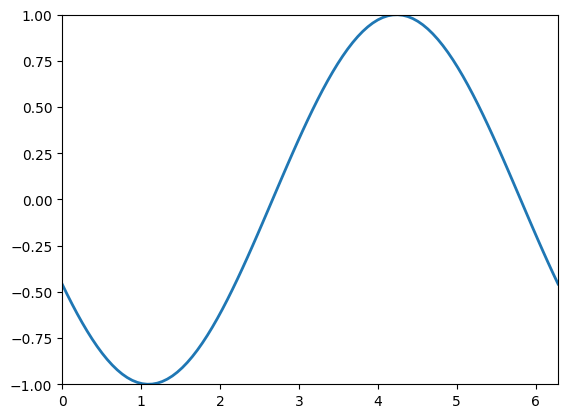

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


#Configuração do Gráfico 
# Criar uma figura e eixos
fig, ax = plt.subplots()

# Inicializar uma linha vazia
# Isso permite que o Matplotlib saiba qual curva precisa ser atualizada em cada quadro da animação. 
# Além disso, definir os estilos da linha.
line, = ax.plot([], [], lw=2)

# Função para inicializar a animação
def init():
    line.set_data([], [])
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return line,

# Função de animação - atualiza o gráfico a cada quadro
#O valor v_escala=0.1 é o fator de escala que controla a velocidade da animação. 
v_escala=0.1
def animate(i):
    x = np.linspace(0, 2*np.pi, 100) 
    y = np.sin(x + i*v_escala)  # exemplo de função que varia ao longo do tempo
    line.set_data(x, y)
    return line,

# Criar a animação
ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True) 
ani.save('Animação seno.mp4', writer='ffmpeg')  # Para salvar como MP4 
# Mostrar a animação
plt.show()


**Exercício 21:** Faça uma animação para a função de um OHS, com  $A=1$, $f=1$ e $\phi=0$.

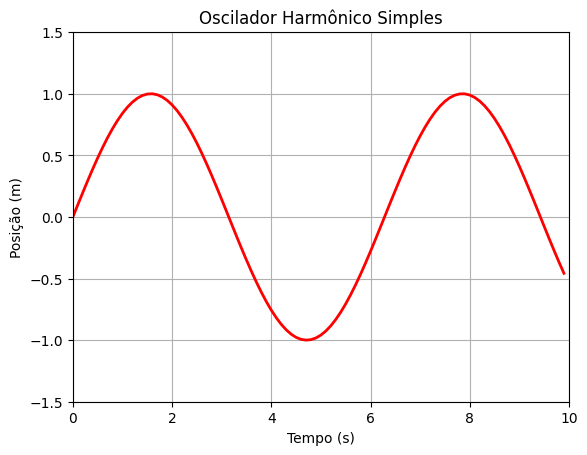

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parâmetros do Oscilador Harmônico Simples
amplitude = 1.0  # Amplitude do movimento
frequencia = 1.0  # Frequência angular do movimento
fase_inicial = 0.0  # Fase inicial do movimento

# Função para calcular a posição do OHS no tempo t
def calcular_posicao(t):
    return amplitude * np.sin(frequencia * t + fase_inicial)


# Criar uma figura e eixos
fig, ax = plt.subplots()
# Inicializar uma linha vazia
line, = ax.plot([], [], lw=2, color='red', label='Posição do OHS')

# Inicializar listas para armazenar os valores de tempo e posição
tempos, posicoes = [], []

# Função de inicialização da animação
def init():
    line.set_data([], [])
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.5, 1.5)
    # Definir rótulos dos eixos e título
    ax.set_xlabel('Tempo (s)')
    ax.set_ylabel('Posição (m)')
    ax.set_title('Oscilador Harmônico Simples')
    ax.grid()
    return line,

# Função de animação - atualiza o gráfico a cada quadro
#O valor v_escala=0.1 é o fator de escala que controla a velocidade da animação. 
v_escala=0.1
def animate(i):
    t = v_escala * i  # passo de tempo arbitrário
    x = calcular_posicao(t)
    # Adiciona os valores de tempo e posição nas listas
    tempos.append(t)
    posicoes.append(x)
    # Atualiza a linha com as listas de valores
    line.set_data(tempos, posicoes)
    return line,

# Criar a animação
ani = FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True) 
ani.save('Animação ohs.mp4', writer='ffmpeg')  # Para salvar como MP4 

# Mostrar a animação
plt.show()


**Exercício 22:** Faça uma animação para uma Série de Fourier de uma Onda Triangular.

**Série de Fourier de uma Onda Triangular**

A Série de Fourier é uma ferramenta matemática poderosa usada para decompor funções periódicas em uma soma de funções senoidais (seno e cosseno) com frequências múltiplas de uma frequência fundamental. Esta decomposição é útil em muitas áreas da ciência e engenharia, como processamento de sinais, acústica e análise de vibrações.

**Onda Triangular**

Uma onda triangular é uma forma de onda periódica que tem um formato triangular, alternando entre valores máximos e mínimos com uma taxa linear constante. Ela é caracterizada por ter uma transição suave e linear entre os picos, ao contrário das ondas quadradas ou dente de serra que possuem transições abruptas.

**Série de Fourier de uma Onda Triangular**

Para uma onda triangular, a Série de Fourier é dada por:
  

$f(x)\approx=\dfrac{\pi}{2}-\dfrac{4}{\pi}  \sum_{k=1}^{k=n}  \dfrac{\cos( (2k-1)x)}{(2k-1)^2}$
 
A amplitude de cada termo na série decai com o quadrado do número da frequência, o que faz com que os harmônicos de alta frequência tenham uma contribuição menor, resultando em uma aproximação suave da onda triangular.
 

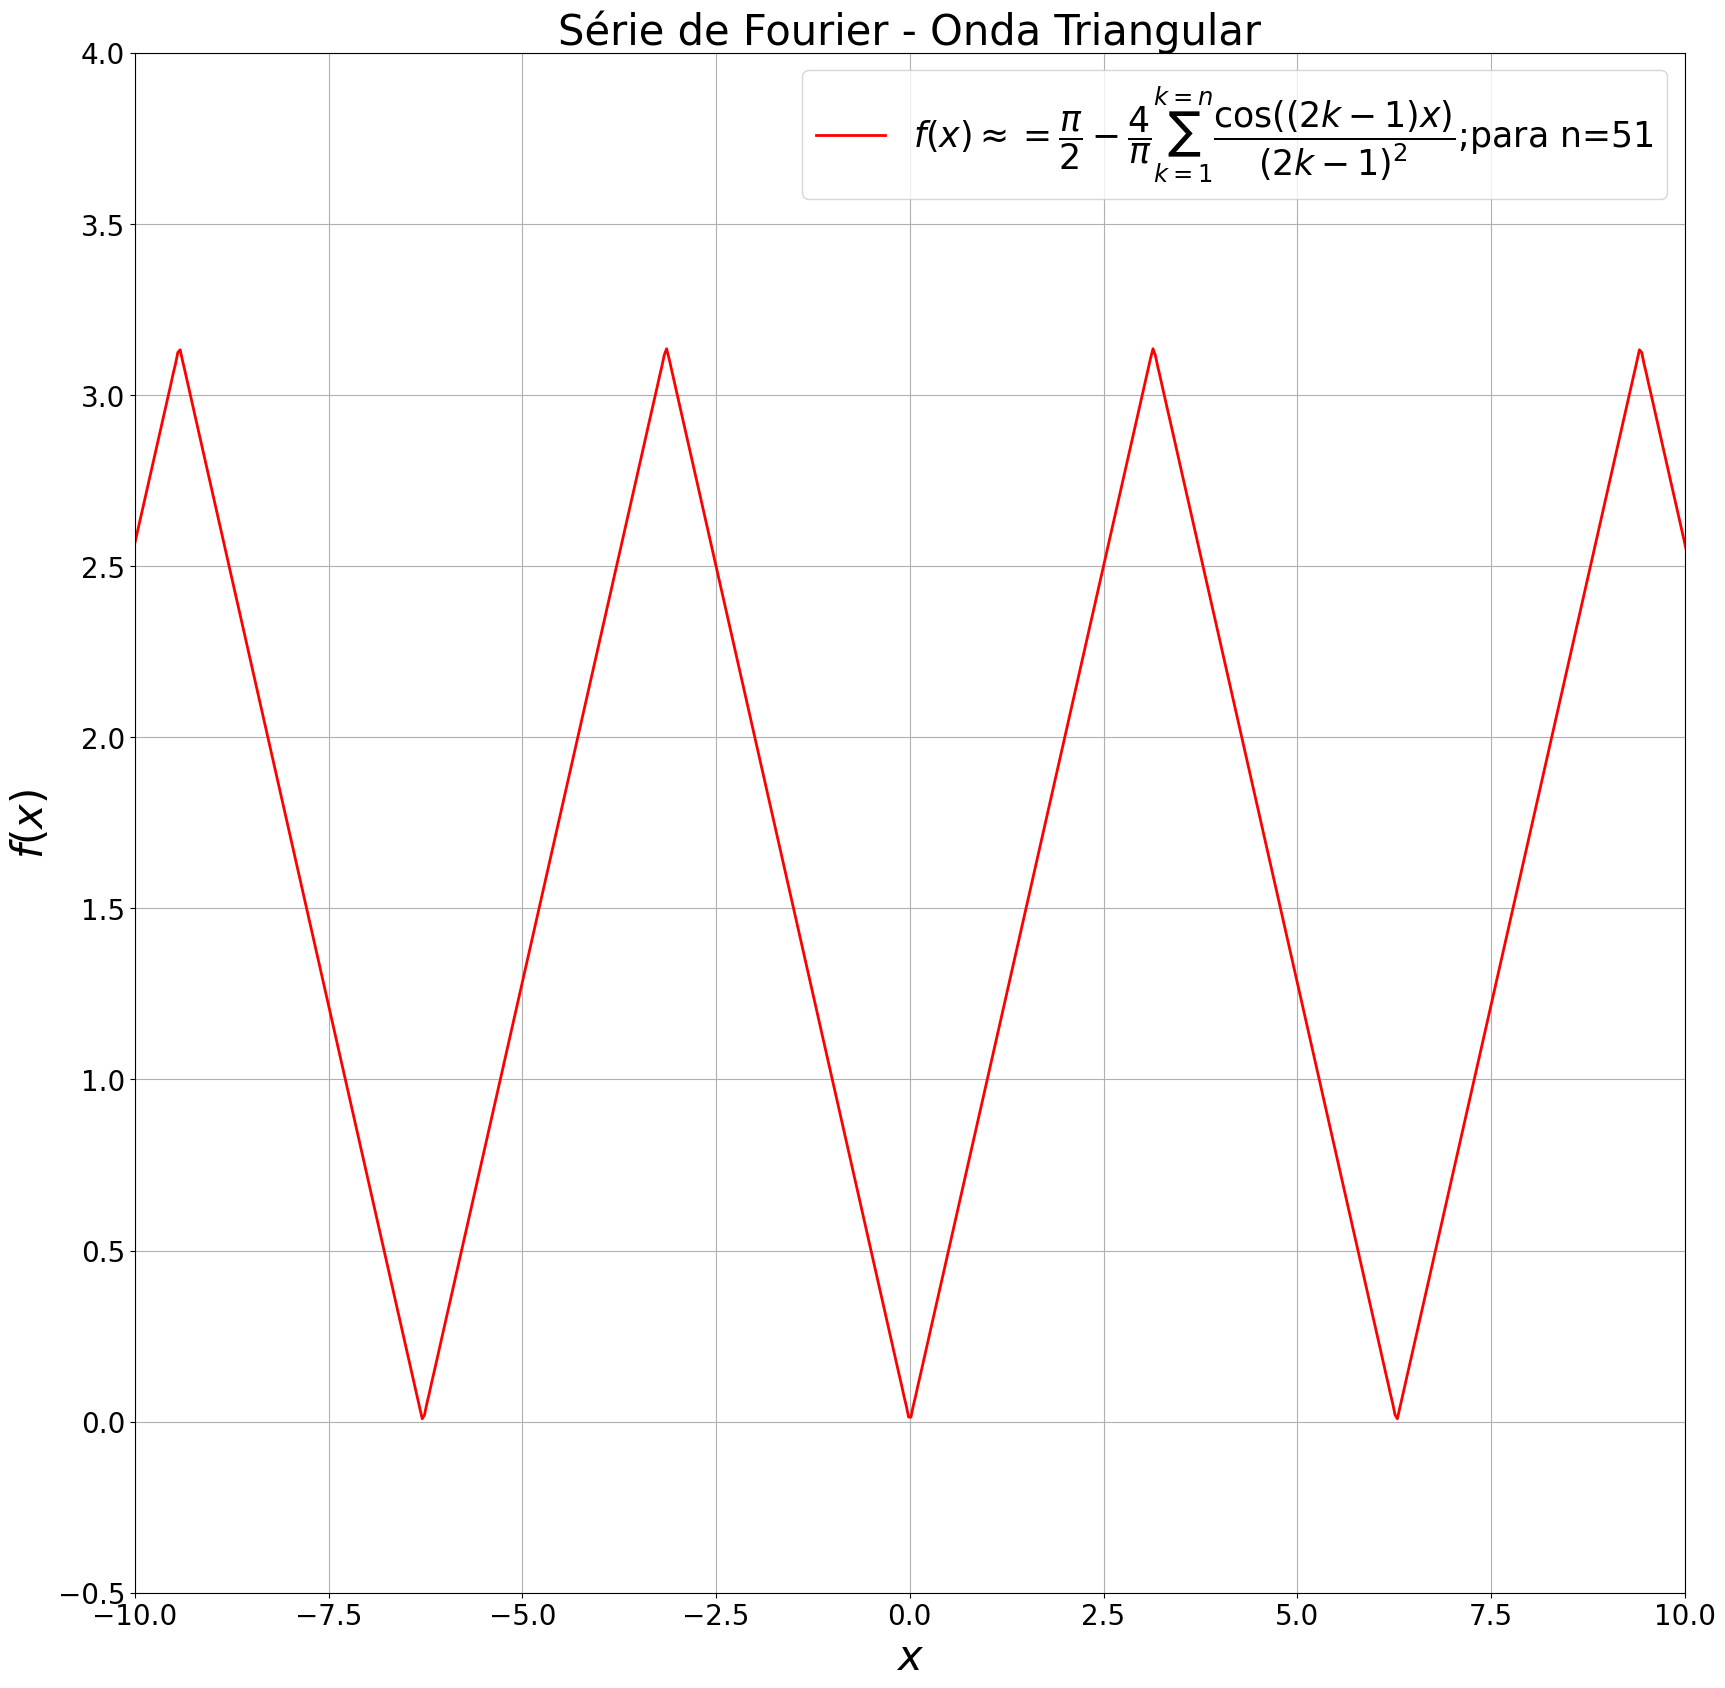

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Função para calcular a Série de Fourier de uma Onda Triangular
def SerieFourier(k):
    S = 0.0
    a0 = (np.pi / 2.0)
    x = np.linspace(-15, 15, 1000)
    for j in range(1, k + 1):
        an=np.cos((2.0*j-1.0)*x)/((2.0*j-1.0)**2.0)  
        S = S + an
    Soma = a0 - (4.0 / np.pi) * S
    return x, Soma
    
 

# Criar uma figura e eixos

fig = plt.figure(figsize=(20,20))
ax = plt.axes(xlim=(-10,10),ylim=(-0.5,4))

line, = ax.plot([], [], lw=2, color='red')

# Função de inicialização da animação
def init():
    ax.set_title('Série de Fourier - Onda Triangular', fontsize=30)
    ax.set_xlabel('$x$', fontsize=30) 
    ax.set_ylabel('$f(x)$', fontsize=30)

    ax.tick_params(axis='both', which='major', labelsize=20)
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)

    ax.grid()
    line.set_data([], [])
    return line,

# Função de animação - atualiza o gráfico a cada quadro
def animate(i):
    x, y = SerieFourier(i + 1)
    ax.legend( ['$f(x)\\approx=\\dfrac{\\pi}{2}-\\dfrac{4}{\\pi}  \\sum_{k=1}^{k=n}  \dfrac{\\cos( (2k-1)x)}{(2k-1)^2}$;'+f'para n={i+1}'], loc='upper right', fontsize=25)
    line.set_data(x,y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=51, interval=2, blit=True)

anim.save('Onda_Triangular.mp4', writer='ffmpeg', fps=3)

plt.show()


Os parâmetros `axis` e `which` do método `tick_params` são usados para especificar quais ticks (marcadores) dos eixos devem ser ajustados.

**`axis`**
Este parâmetro especifica quais eixos você deseja ajustar. Ele pode ter os seguintes valores:

- `'x'`: Ajusta apenas os ticks do eixo x.
- `'y'`: Ajusta apenas os ticks do eixo y.
- `'both'`: Ajusta os ticks de ambos os eixos (x e y).

**`which`**
Este parâmetro especifica quais ticks dentro dos eixos devem ser ajustados. Ele pode ter os seguintes valores:

- `'major'`: Ajusta apenas os ticks principais. Os ticks principais são aqueles normalmente mais destacados e frequentemente rotulados com números ou texto.
- `'minor'`: Ajusta apenas os ticks menores. Os ticks menores são mais curtos e menos destacados, usados para dividir intervalos maiores.
- `'both'`: Ajusta tanto os ticks principais quanto os menores.
 

**Exercício 23:** Faça uma animação para uma Série de Fourier de uma Onda Quadrada.

**Série de Fourier de uma Onda Quadrada**

Para uma onda Quadrada, a Série de Fourier é dada por:
  
$f(x)\approx=\dfrac{1}{2}-\dfrac{2}{\pi}  \sum_{k=1}^{k=n}  \dfrac{\sin( (2k-1)\pi x)}{2k-1}$


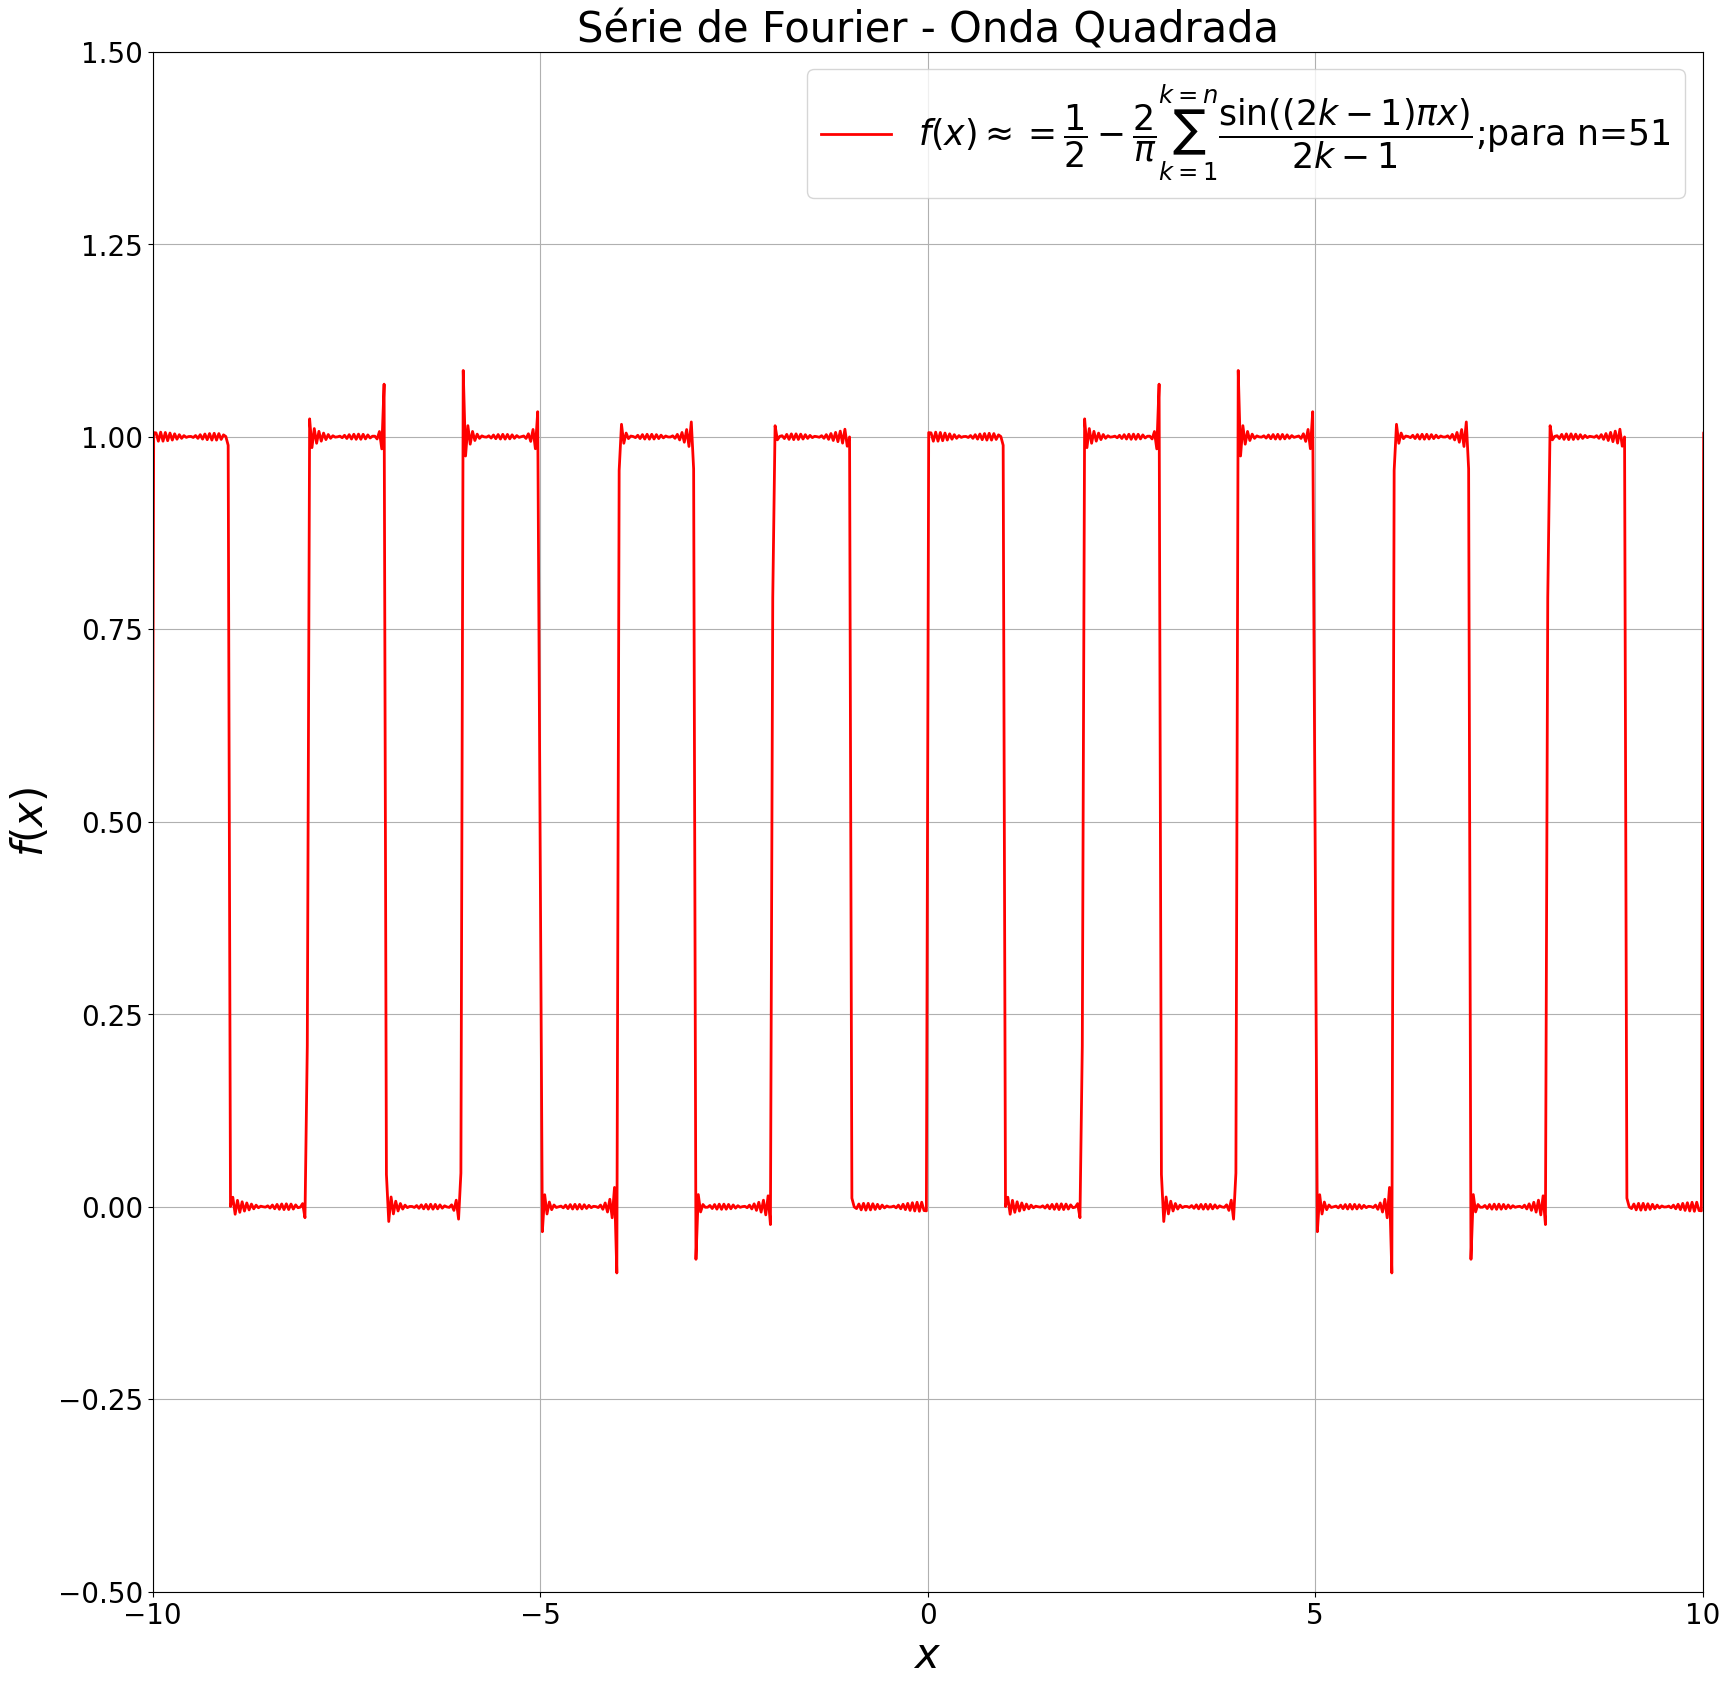

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Função para calcular a Série de Fourier de uma Onda Quadrada
def SerieFourier_OndaQuadrada(k):
    S=0.0
    a0=(1.0/2.0)
    x = np.linspace(-15, 15, 1000)
    for j in range(1,k+1):  
        an=np.sin((2.0*j-1.0)*np.pi*x)/(2.0*j-1.0) 
        S=S+an
    Soma = a0+(2.0/np.pi)*S 
    return x, Soma
    
 

# Criar uma figura e eixos

fig = plt.figure(figsize=(20,20))
ax = plt.axes(xlim=(-10,10),ylim=(-0.5,1.5))

line, = ax.plot([], [], lw=2, color='red')

# Função de inicialização da animação
def init():
    ax.set_title('Série de Fourier - Onda Quadrada', fontsize=30)
    ax.set_xlabel('$x$', fontsize=30) 
    ax.set_ylabel('$f(x)$', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=50)

    ax.grid()
    line.set_data([], [])
    return line,

# Função de animação - atualiza o gráfico a cada quadro
def animate(i):
    x, y = SerieFourier_OndaQuadrada(i + 1)
    ax.legend( ['$f(x)\\approx=\\dfrac{1}{2}-\\dfrac{2}{\\pi}  \\sum_{k=1}^{k=n}  \dfrac{\\sin( (2k-1)\\pi x)}{2k-1}$;'+f'para n={i+1}'], loc='upper right', fontsize=25)
    line.set_data(x,y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=51, interval=2, blit=True)

anim.save('Onda_Quadrada.mp4', writer='ffmpeg', fps=3)

plt.show()


**Exercício 24:** Faça uma animação para a posição e para o momento de um Pacotes de Onda.

**Pacotes de Onda: Uma Explicação**

Os pacotes de onda são conceitos fundamentais na física quântica que descrevem o comportamento de partículas como ondas localizadas no espaço e no momento.

**Parâmetros do Pacote de Onda**:
   - `d`, `A`, `X_med`, `P_med` e `h` são parâmetros que definem o pacote de onda quântico. `d` representa o espalhamento espacial, `A` é a amplitude do pacote, `X_med` e `P_med` são a posição média e o momentum médio do pacote, respectivamente, e `h` é a constante de Planck reduzida.


$\left \langle x | \alpha \right\rangle= \left[ \dfrac{1}{(2\pi)^{1/4} \sqrt{d} }  \right] exp\left( \dfrac{i\left \langle p \right\rangle x}{\hbar} -\dfrac{(x-\left \langle x  \right\rangle)^2}{4d^2} \right)  $

$\left \langle p | \alpha \right\rangle =\left[\sqrt{\dfrac{2d}{\hbar \sqrt{2\pi}}}  \right] exp\left( \dfrac{-i \left \langle x \right\rangle}{\hbar} (p-\left \langle p \right\rangle ) -\dfrac{d^2}{\hbar}(p-\left \langle p \right\rangle )^2 \right)$
 
 

/tmp/ipykernel_6639/1784446707.py:51: RuntimeWarning: divide by zero encountered in divide
  y = A*np.exp( (1.0j*x*P_med/h) -(((x-X_med)**2)/(4*(d*i)**2)) )


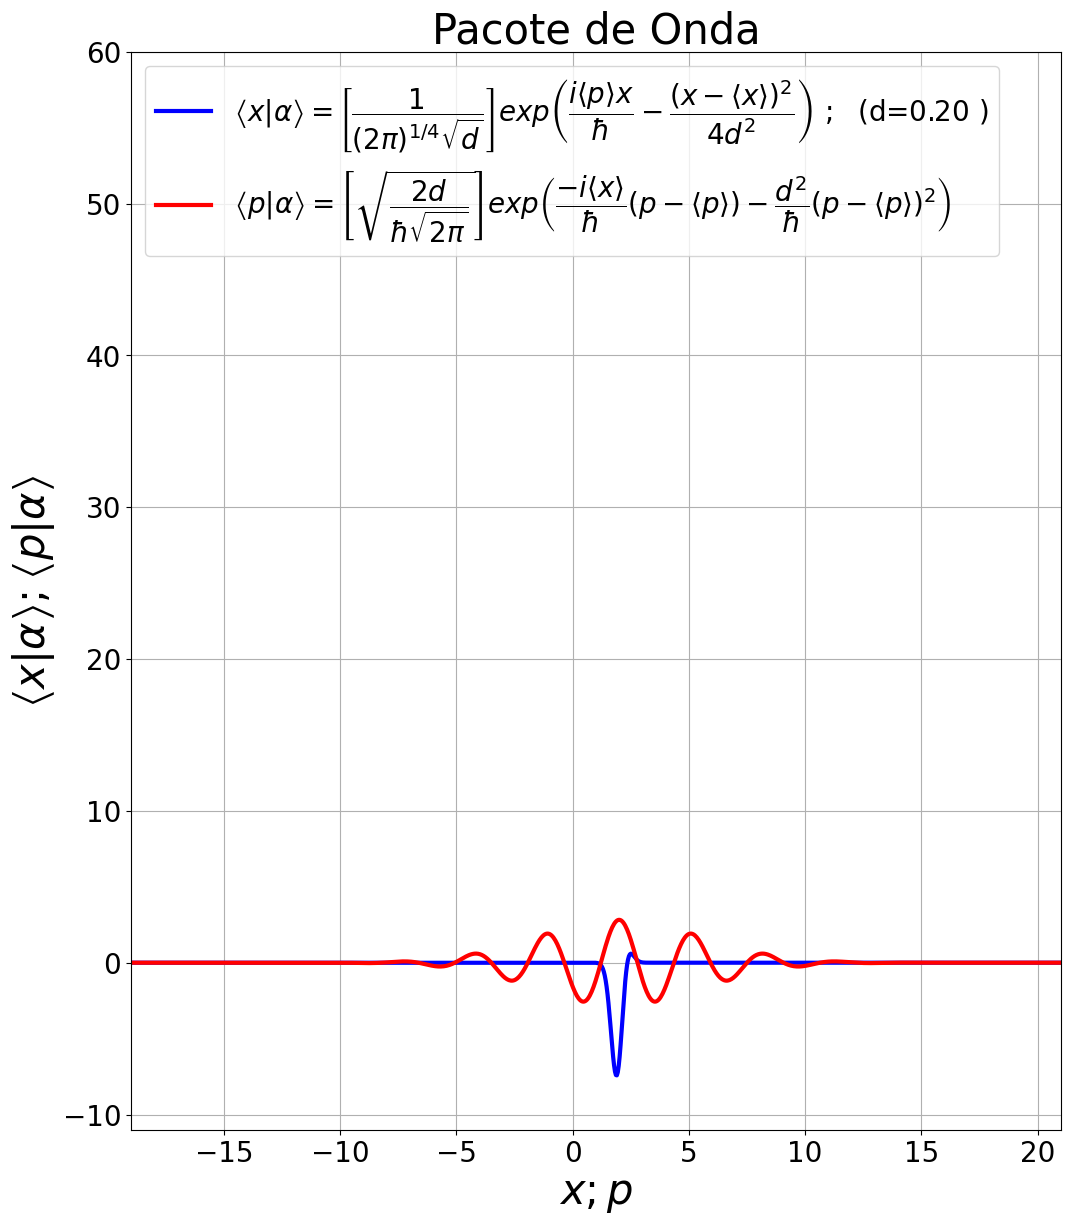

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

d=0.004
A=1.0/((2*np.pi)**(1.0/4.0)*(d**(1.0/2.0)) )
X_med=2.0
P_med=2.0
h=1.0

 
     
# Criar uma figura e eixos
fig = plt.figure(figsize=(12,14))
ax = plt.axes(xlim=(-19,21),ylim=(-11,60))

line, = ax.plot([],[],lw=3, color='blue', linestyle='-' )
line2, = ax.plot([],[],lw=3, color='red', linestyle='-' )

 
# Função de inicialização da animação
def init():
    ax.set_title('Pacote de Onda', fontsize=30) # ($\\hbar=1$, <x>=2, <y>=2)
    ax.set_xlabel('$x;p$', fontsize=30) 
    ax.set_ylabel('$\\left \\langle x | \\alpha \\right\\rangle ;  \\left \\langle p | \\alpha \\right\\rangle $', fontsize=30)
 
    ax.tick_params(axis='both', which='major', labelsize=20)

    ax.grid()
    line.set_data([], [])
    return line, line2,

# Função de animação - atualiza o gráfico a cada quadro
def animate(i):
    s=d*i
    x=np.linspace(-19,21,1000)
    p=np.linspace(-19,21,1000)

    y = A*np.exp( (1.0j*x*P_med/h) -(((x-X_med)**2)/(4*(d*i)**2)) )

    y_p = (A*2*(d*i)/(2*h)**(1./2.))*np.exp( (1.0j*(X_med/h)*(p-P_med) ) -(((p-P_med)**2)*(d*i)**2/(h**2)) )

    plt.legend( ['$\\left \\langle x | \\alpha \\right\\rangle= \\left[ \\dfrac{1}{(2\\pi)^{1/4} \\sqrt{d} }  \\right] exp\\left( \\dfrac{i\\left \\langle p \\right\\rangle x}{\\hbar} -\\dfrac{(x-\\left \\langle x  \\right\\rangle)^2}{4d^2} \\right) \\ ;\\ $ (d=%.2f )'% s,
                 '$\\left \\langle p | \\alpha \\right\\rangle =\\left[\\sqrt{\\dfrac{2d}{\\hbar \\sqrt{2\\pi}}}  \\right] exp\\left( \\dfrac{-i \\left \\langle x \\right\\rangle}{\\hbar} (p-\\left \\langle p \\right\\rangle ) -\\dfrac{d^2}{\\hbar}(p-\\left \\langle p \\right\\rangle )^2 \\right)$'],loc=2)
    line.set_data(x, np.real(y))
    line2.set_data(x, np.real(y_p))
    return line, line2,

anim = FuncAnimation(fig, animate, init_func=init, frames=51, interval=2, blit=True)

anim.save('Pacote_de_Onda.mp4', writer='ffmpeg', fps=3)

plt.show()


# Pandas

In [ ]:
import pandas as pd
import numpy as np

# Criar um DataFrame com números aleatórios
df = pd.DataFrame({
    'A': np.random.randn(5),  # números aleatórios de uma distribuição normal
    'B': np.random.randint(1, 10, size=5),  # números aleatórios inteiros entre 1 e 10
    'C': np.random.uniform(0, 1, size=5)  # números aleatórios de uma distribuição uniforme entre 0 e 1
})

df




In [ ]:
# Exibir as primeiras linhas do DataFrame:
df.head()



**Leitura de Dados**

In [ ]:
import pandas as pd

# Carregar o arquivo com espaço como delimitador
df = pd.read_csv('exp_mru.txt', delimiter=' ')

df


In [ ]:
# Amostra aleatoria:
df.sample(3)



In [ ]:

# Resumo estatístico dos dados:
print(df.describe())



In [ ]:
# Obter informações sobre o DataFrame:
print(df.info())


# Verificar os tipos de dados de cada coluna:
print(df.dtypes)

# Filtrar linhas com base em uma condição
print(df[ df['Posição(cm)'] > 90])



In [ ]:
# Visualização de Dados:
df.plot(x='Tempo(s)', y='Posição(cm)', kind='scatter', color= 'g')
plt.grid(True)
plt.show()
